<a href="https://colab.research.google.com/github/FL24-Team-2018/DP-Experiment/blob/master/analysis/fit_CDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preamble

In [19]:
!pip install lmfit

     |████████████████████████████████| 1.5MB 4.8MB/s 
     |████████████████████████████████| 61kB 22.4MB/s 
     |████████████████████████████████| 235kB 44.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/4d/c7/5b/54a6b3c125f6c8e5464bd752c06b2623c574f704f10ac7973a
  Stored in directory: /root/.cache/pip/wheels/5e/10/fe/e4de9d07a975e15c14322cf93d38420b3a2dd2616f5ec00bef
  Stored in directory: /root/.cache/pip/wheels/b9/70/04/df985497cb7167a254bbf7c8bcc56727a5e8072530cf30544a
Successfully built lmfit asteval uncertainties


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model


# Fitting

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 4
    # variables        = 1
    chi-square         = 0.02116071
    reduced chi-square = 0.00705357
    Akaike info crit   = -18.9676144
    Bayesian info crit = -19.5813200
[[Variables]]
    amp:    1 (fixed)
    cen:    0 (fixed)
    sigma:  873.770338 +/- 86.6833533 (9.92%) (init = 546)



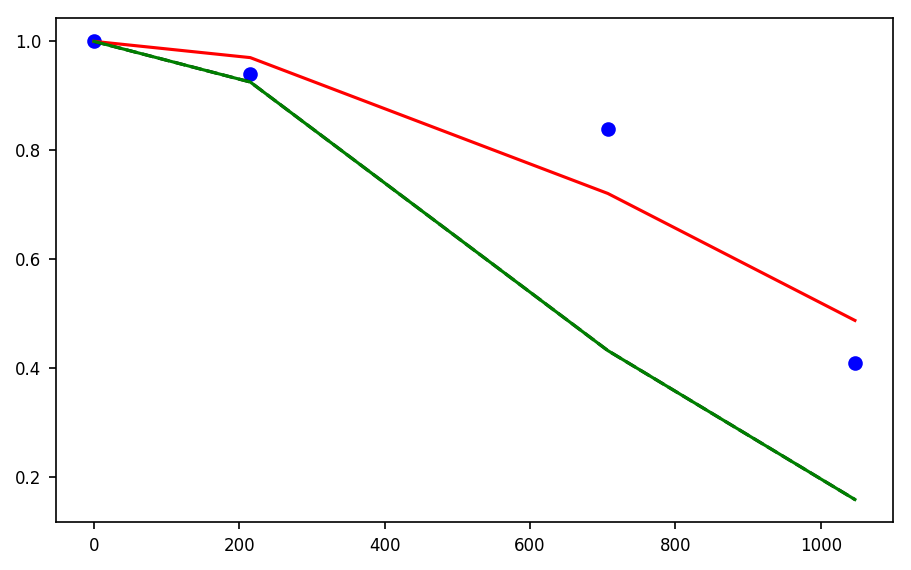

In [54]:

# data = loadtxt('model1d_gauss.dat')
# x = data[:, 0]
# y = data[:, 1]



# x = [0, 215, 445, 707]
# y = [1, 0.88, 0.79, 0.35]

# 18nm_S

xdata = [0, 215, 707, 1047]
ydata = [1, 0.94, 0.84, 0.41]

x = xdata
y = ydata

def gaussian_v1(x, amp, cen, sigma):
    """1-d gaussian: gaussian(x, amp, cen, sigma)"""
    return (amp / (sqrt(2*pi) * sigma)) * exp(-(x-cen)**2 / (2*sigma**2))
  
def gaussian(x, amp, cen, sigma):
    """1-d gaussian: gaussian(x, amp, cen, sigma)"""
    return (amp  * exp(-(x-cen)**2 / (2*sigma**2)))


mymodel = Model(gaussian)
sigma = 546
params = mymodel.make_params(amp=1, cen=0, sigma=sigma)
params['amp'].vary = False
params['cen'].vary = False
mymodel.set_param_hint('sigma', value=sigma)

result = mymodel.fit(y, params, x=x)

sigma_fit = result.params['sigma'].value
sigma_stderr_fit = result.params['sigma'].stderr

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
y1 = [gaussian(x=x, amp=1, cen=0, sigma=sigma) for x in x]
plt.plot(x, y1, 'g-')

plt.show()


# plotting

In [0]:
# nature: single-column width = 83mm = 3.26 in
# nature: double-column width = 183mm = 7.20 in
# optics express: side by side up to width = 66mm = 2.59 in
# optics express: maximum width of text= 132.8mm = 5.25 in
# optics express: caption font size=8 pt
# new journal of physics ?

figurewidth = 3.26 # in inch
#figurewidth = 7.2 # in inch
figureheight = figurewidth / 1.618 # golden ratio

In [0]:
rcparams_with_latex = {                      # setup matplotlib to use latex for output
    "text.usetex": False,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots 
    "font.sans-serif": [],              # to inherit fonts from the document
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts 
    "xtick.labelsize": 8,               # a little smaller
    "ytick.labelsize": 8,
    "figure.figsize": [figurewidth, figureheight],     # default fig size of 0.9 textwidth
    "figure.dpi": 150, 
    "text.latex.preamble": [
        #r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts 
        r"\usepackage[T1]{fontenc}",        # plots will be generated
        r'\usepackage{lmodern}', # otherwise savefig to pdf will produce an error!!
        r"\usepackage[detect-all,locale=DE]{siunitx}",
        r"\usepackage{amsmath}"
        ]                                   # using this preamble
    }


#mpl.rcParams.update(pgf_with_latex)
mpl.rcParams.update(rcparams_with_latex)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


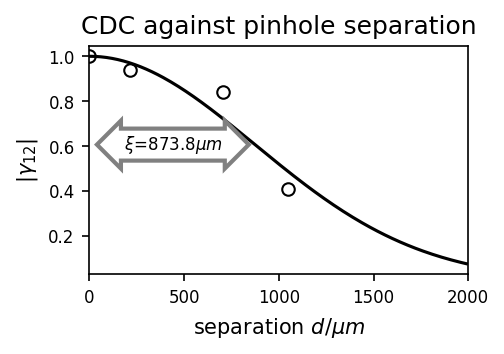

In [111]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True)
ax = axs



label = '18nm horizontal S' #?
x = xdata
y = ydata
#yerr = 
ax.errorbar(x, y, fmt='o',
            capsize=2, elinewidth=1, markeredgewidth=1, color='black', fillstyle='none', label=label)

x = np.arange(0.0, 2000, 10)
y1 = [gaussian(x=x, amp=1, cen=0, sigma=sigma_fit) for x in x]
ax.plot(x, y1, 'k-')

#ax.hlines(0.606, 0, wid_fit, linestyles = 'dashed')
#ax.text('--------$ \\xi $--------', (wid_fit/2,0.7))

bbox_props = dict(boxstyle="darrow,pad=0.3", fc="none", ec="grey", lw=2)
t = ax.text(sigma_fit/2, 0.606, "  $\\xi$="+str(round(sigma_fit,1))+'$\mu m$  ', ha="center", va="center", rotation=0,
            size=8,
            bbox=bbox_props)

ax.set_xlim([0,2000])

ax.set_xlabel('separation $ d / \mu m $')
ax.set_ylabel('$|\gamma_{12}|$')
ax.set_title('CDC against pinhole separation')
plt.show()